In [1]:
import re
import pandas as pd
pd.options.mode.chained_assignment = None
import os
import time
from datetime import datetime
import json
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from PIL import Image
import pytz

%run GPT_35_utils.ipynb

In [2]:
# Authenticates with the AzureOpenAI using provided API key

from openai import AzureOpenAI

openai_api_key = os.getenv("OPENAI_API_KEY")

deployment_name = 'turbo_RD_PROJECTS_DEV'

client = AzureOpenAI(
    api_key=openai_api_key,  
    api_version="2023-07-01-preview",
    azure_endpoint = "https://eastus.api.cognitive.microsoft.com/"
    )

In [8]:
# Setting up some important variables

model_name= "microsoft/Phi-3-mini-128k-instruct"

match = re.search(r'/([^/]*)$', model_name)
global simplified_model_name
simplified_model_name = match.group(1)

dataset_name = 'squad_v2'

tests_specifics_filepath = f"/home/drossini/streamed_results/{simplified_model_name}/tests_specifics.txt"

start_day, start_hour, end_day, end_hour = get_start_end_times(tests_specifics_filepath)

experience_timestamps = [start_day, start_hour, end_day, end_hour]

In [10]:
# Values retieval

df_before_GPT = get_all_values_df(model_answers_folder_path = f"../home/drossini/streamed_results/{simplified_model_name}/model_answers/", 
                      cosine_sim_folder_path = f"../home/drossini/streamed_results/{simplified_model_name}/cosine_similarity_model_vs_dataset_answers/", 
                      start_day=start_day, 
                      start_hour=start_hour, 
                      end_day=end_day, 
                      end_hour=end_hour)

In [5]:
df_before_GPT

,timestamp,generation_time,n_input_token,n_output_token,dataset_context,dataset_question,dataset_answer,model_answer,cosine_similarity_between_answers
0,2024-05-02 11:03:47,0:0:0:1.13,200,10,"Charles Pollak (born Karol Pollak), the invent...",Who invented the second electrolytic capacitor?,I don't know,Charles Pollak invented the second electrolyti...,0.739188
1,2024-05-02 11:03:47,0:0:0:1.13,189,4,A railway electrification system supplies elec...,What system supplies nuclear power to railway ...,I don't know,Nuclear power.,0.764022
2,2024-05-02 11:03:47,0:0:0:1.13,188,4,"Audio data compression, not to be confused wit...",What has the potential to reduce the transmiss...,I don't know,Audio compression algorithms.,0.740520
3,2024-05-02 11:03:47,0:0:0:1.13,229,4,"In the 2007–2008 school year, there were 181,9...",How many of Oklahoma's 2007 undergrads complet...,"18,892","18,892.",0.986384
4,2024-05-02 11:03:47,0:0:0:1.13,227,182,DeveloperWorks is a website run by IBM for sof...,DeveloperWorks has content about open industry...,Linux,---------\nI don't know. DeveloperWorks has re...,0.769690
...,...,...,...,...,...,...,...,...,...
3995,2024-05-02 11:59:52,0:0:0:0.07,205,13,The Fourteenth Amendment to the United States ...,What does the 14th Amendment also introduce th...,incorporation of all relevant federal rights a...,Incorporation of all relevant federal rights a...,0.979149
3996,2024-05-02 11:59:52,0:0:0:0.07,209,7,Clothing can and has in history been made from...,Jewelry is usually consider clothing because h...,I don't know,To be worn for adornment.,0.749497
3997,2024-05-02 11:59:52,0:0:0:0.07,236,7,Yazid died while the siege was still in progre...,What army left Damascus?,I don't know,The Umayyad army.,0.749462
3998,2024-05-02 11:59:52,0:0:0:0.07,198,1,Cubism formed an important link between early-...,What was the reception like in Italy?,I don't know,,0.816405


In [6]:
# Running questions to GPT 3.5 turbo

df_final = answers_comparison_GPT_35_turbo(deployment_name=deployment_name, 
                                           client=client, 
                                           df_before_GPT=df_before_GPT, 
                                           model_name=model_name, 
                                           dataset_name=dataset_name, 
                                           experience_timestamps=experience_timestamps)

Error
Error
Error
Error
Error
Error
Error
Error
Error
Total judgment time for GPT 3.5 turbo: 0:0:20:21.83


In [7]:
df_final

,timestamp,generation_time,n_input_token,n_output_token,dataset_context,dataset_question,dataset_answer,model_answer,cosine_similarity_between_answers,GPT_35_judgment
0,2024-05-02 11:03:47,0:0:0:1.13,200,10,"Charles Pollak (born Karol Pollak), the invent...",Who invented the second electrolytic capacitor?,I don't know,Charles Pollak invented the second electrolyti...,0.739188,No
1,2024-05-02 11:03:47,0:0:0:1.13,189,4,A railway electrification system supplies elec...,What system supplies nuclear power to railway ...,I don't know,Nuclear power.,0.764022,No
2,2024-05-02 11:03:47,0:0:0:1.13,188,4,"Audio data compression, not to be confused wit...",What has the potential to reduce the transmiss...,I don't know,Audio compression algorithms.,0.740520,Yes
3,2024-05-02 11:03:47,0:0:0:1.13,229,4,"In the 2007–2008 school year, there were 181,9...",How many of Oklahoma's 2007 undergrads complet...,"18,892","18,892.",0.986384,Yes
4,2024-05-02 11:03:47,0:0:0:1.13,227,182,DeveloperWorks is a website run by IBM for sof...,DeveloperWorks has content about open industry...,Linux,---------\nI don't know. DeveloperWorks has re...,0.769690,No
...,...,...,...,...,...,...,...,...,...,...
3995,2024-05-02 11:59:52,0:0:0:0.07,205,13,The Fourteenth Amendment to the United States ...,What does the 14th Amendment also introduce th...,incorporation of all relevant federal rights a...,Incorporation of all relevant federal rights a...,0.979149,Yes
3996,2024-05-02 11:59:52,0:0:0:0.07,209,7,Clothing can and has in history been made from...,Jewelry is usually consider clothing because h...,I don't know,To be worn for adornment.,0.749497,No
3997,2024-05-02 11:59:52,0:0:0:0.07,236,7,Yazid died while the siege was still in progre...,What army left Damascus?,I don't know,The Umayyad army.,0.749462,Yes
3998,2024-05-02 11:59:52,0:0:0:0.07,198,1,Cubism formed an important link between early-...,What was the reception like in Italy?,I don't know,,0.816405,No


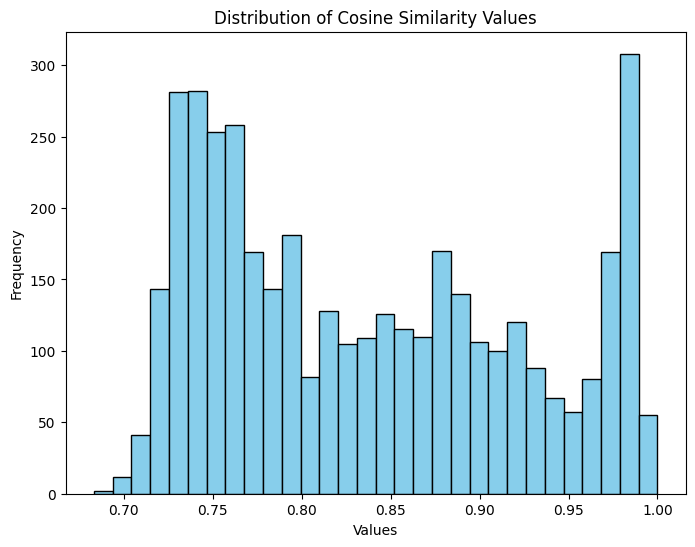

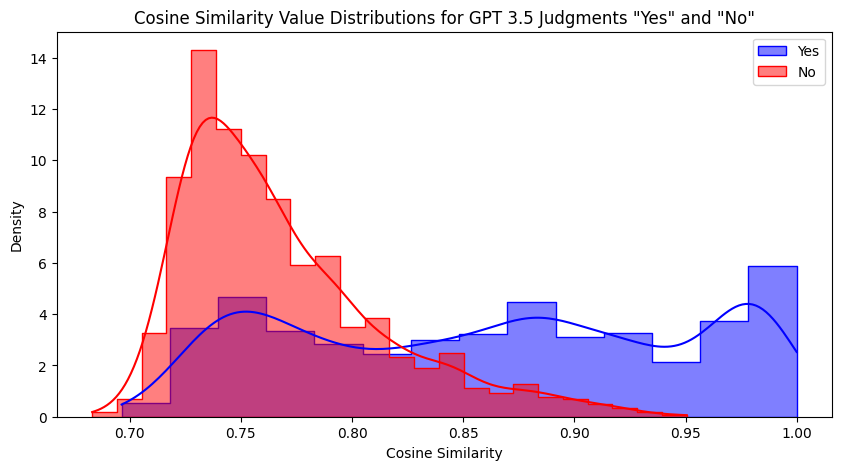

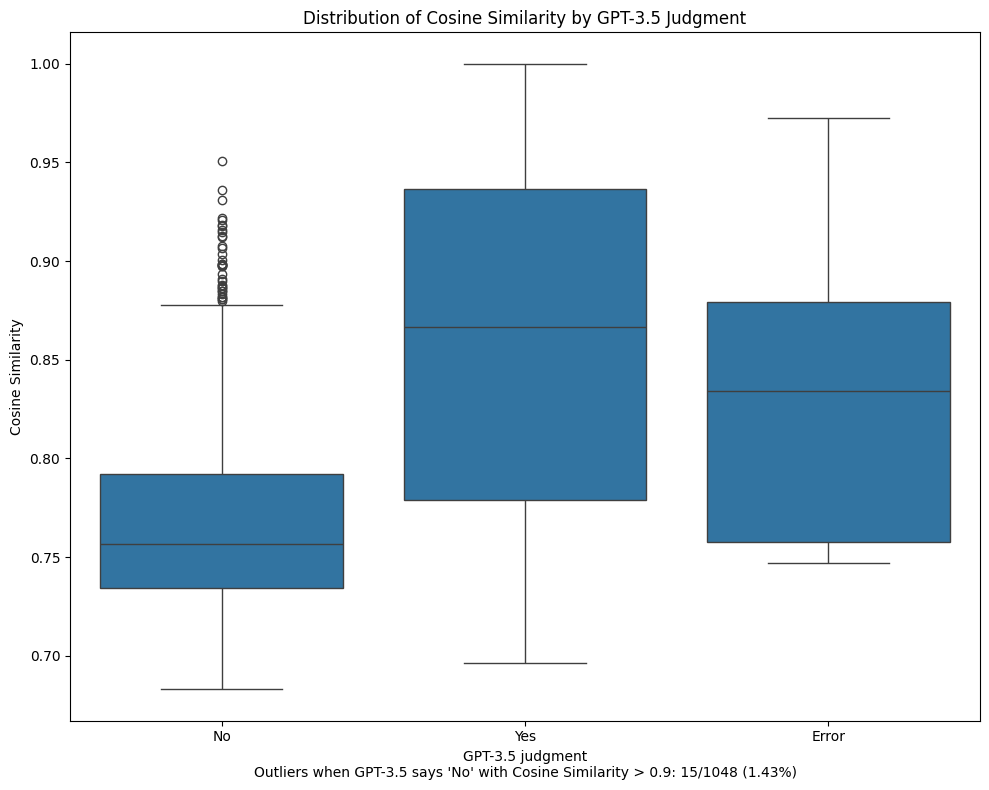

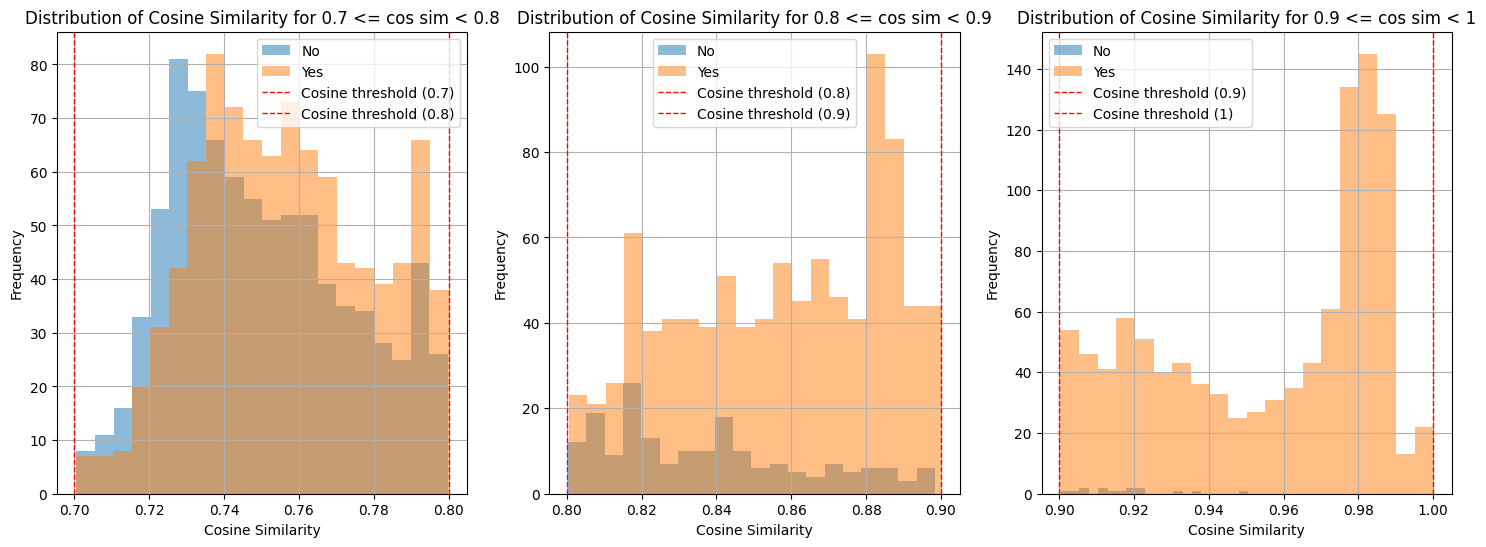

In [8]:
# Save and show plots

save_plots(start_day=start_day, start_hour=start_hour, end_day=end_day, end_hour=end_hour, simplified_model_name=model_name, df_final=df_final)

In [9]:
# Add "trust" score to the txt document

write_test_experience_score(tests_specifics_filepath, df_final)